# Criando DataFrame com dados aleatórios

In [ ]:
import pandas as pd
import numpy as np

# Dados de vendas
np.random.seed(42)
data = {
    "Data": pd.date_range(start="2023-01-01", periods=100),
    "Vendas": np.random.randint(50, 200, size = 100),
    "Categoria": np.random.choice(["Eletrônicos", "Roupas", "Alimentos"], size = 100)
}
df_python = pd.DataFrame(data)
print(df_python.head())

# Resumo do dataset¹

In [ ]:
# Estatísticas descritivas
print(df_python.describe())

# Resumo do dataset²

In [ ]:
df_python.info()

In [ ]:
df_python['Categoria'].mode()[0]

In [ ]:
print(df_python["Vendas"].sum())
print(df_python["Vendas"].mean())
print(df_python["Vendas"].median())
print(df_python["Vendas"].min())
print(df_python["Vendas"].max())
print(df_python["Vendas"].std())

In [ ]:
print(df_python.groupby("Categoria")["Vendas"].mean())

# Estatísticas por agrupamento de variáveis

In [ ]:
# Agrupar por categoria
print(df_python.groupby("Categoria")["Vendas"].mean())
print(df_python.groupby("Categoria")["Vendas"].std())
print(df_python.groupby("Categoria")["Vendas"].min())
print(df_python.groupby("Categoria")["Vendas"].max())
print(df_python.groupby("Categoria")["Vendas"].median())
print(df_python.groupby("Categoria")["Vendas"].sum())

# Testes de média paramétricos e não-paramétricos

In [ ]:
from scipy import stats
import numpy as np

# Filtrar as categorias desejadas
df_filtrado = df_python[df_python['Categoria'].isin(['Eletrônicos', 'Roupas'])]

# Agrupar por categoria e pegar os valores de vendas
vendas_eletronicos = df_filtrado[df_filtrado['Categoria'] == 'Eletrônicos']['Vendas']
vendas_roupas = df_filtrado[df_filtrado['Categoria'] == 'Roupas']['Vendas']

# Teste de normalidade (Shapiro-Wilk)
shapiro_eletronicos_stat, shapiro_eletronicos_p = stats.shapiro(vendas_eletronicos)
shapiro_roupas_stat, shapiro_roupas_p = stats.shapiro(vendas_roupas)

print(f"Teste de normalidade (Eletrônicos): Estatística = {shapiro_eletronicos_stat:.4f}, Valor-p = {shapiro_eletronicos_p:.4f}")
print(f"Teste de normalidade (Roupas): Estatística = {shapiro_roupas_stat:.4f}, Valor-p = {shapiro_roupas_p:.4f}")

# Decidir qual teste usar (Teste t ou Mann-Whitney U)
alpha = 0.05
if shapiro_eletronicos_p > alpha and shapiro_roupas_p > alpha:
    # Ambos os grupos são aproximadamente normais, usar Teste t
    t_stat, p_value = stats.ttest_ind(vendas_eletronicos, vendas_roupas, equal_var=False)  # Assume variâncias diferentes
    print(f"\nTeste t: Estatística = {t_stat:.4f}, Valor-p = {p_value:.4f}")
else:
    # Pelo menos um grupo não é normal, usar Teste de Mann-Whitney U
    u_stat, p_value = stats.mannwhitneyu(vendas_eletronicos, vendas_roupas, alternative='two-sided')
    print(f"\nTeste de Mann-Whitney U: Estatística = {u_stat:.4f}, Valor-p = {p_value:.4f}")

# Gráfico de Boxplot para comparar médias de grupos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de vendas por categoria
sns.boxplot(x="Categoria", y="Vendas", data=df_python)
plt.title("Vendas por Categoria")
plt.show()

#  Codificando as variáveis categóricas

In [ ]:
# Criar variáveis dummy para 'Categoria'
df_encoded = pd.get_dummies(df_python, columns=['Categoria'], drop_first=False)

# Calcular a matriz de correlação
correlation_matrix = df_encoded[['Vendas', 'Categoria_Eletrônicos', 'Categoria_Roupas', 'Categoria_Alimentos']].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Análises de Correlação (paramétricas e não-paramétricas)

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um DataFrame de exemplo (usando o df_python data with Vendas and a category)
# For demonstration, let's use a subset and simplify.
# In a real scenario, you would apply this to the actual df_python with categories.
# As an example, let's check correlation between Vendas and a dummy variable for 'Eletrônicos'
df_temp = df_python.copy()
df_temp['Is_Eletronicos'] = (df_temp['Categoria'] == 'Eletrônicos').astype(int)

vendas = df_temp['Vendas']
is_eletronicos = df_temp['Is_Eletronicos']

# Teste de normalidade para Vendas
shapiro_stat, shapiro_p = stats.shapiro(vendas)
print(f"Teste de normalidade (Vendas): Estatística = {shapiro_stat:.4f}, Valor-p = {shapiro_p:.4f}")

# Decidir qual teste de correlação usar
alpha = 0.05
if shapiro_p > alpha:
    # Dados aproximadamente normais, usar Correlação de Pearson
    correlation, p_value = stats.pearsonr(vendas, is_eletronicos)
    print(f"\nCorrelação de Pearson: {correlation:.4f}, Valor-p = {p_value:.4f}")
else:
    # Dados não normais, usar Correlação de Spearman
    correlation, p_value = stats.spearmanr(vendas, is_eletronicos)
    print(f"\nCorrelação de Spearman: {correlation:.4f}, Valor-p = {p_value:.4f}")

# Exemplo de gráfico de Dispersão para análises de Correlação

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar dados fictícios com relação linear
np.random.seed(52)
X = np.random.rand(100) * 10
y = 2 * X + np.random.normal(0, 2, 100)

# DataFrame
df_reg = pd.DataFrame({"X": X, "y": y})

# Modelo de regressão e gráfico
sns.lmplot(x="X", y="y", data=df_reg, line_kws={"color": "red"})
plt.title("Regressão Linear (Python)")
plt.show()

# Análise de Variância ou Kruskal-Wallis
(para comparar médias de três ou mais grupos)

In [3]:
import pandas as pd
import numpy as np

# Dados de vendas
np.random.seed(42)
data = {
    "Data": pd.date_range(start="2023-01-01", periods=100),
    "Vendas": np.random.randint(50, 200, size = 100),
    "Categoria": np.random.choice(["Eletrônicos", "Roupas", "Alimentos"], size = 100)
}
df_python = pd.DataFrame(data)
print(df_python.head())

        Data  Vendas    Categoria
0 2023-01-01     152       Roupas
1 2023-01-02     142    Alimentos
2 2023-01-03      64    Alimentos
3 2023-01-04     156  Eletrônicos
4 2023-01-05     121    Alimentos


In [4]:
from scipy import stats
import statsmodels.stats.multicomp as mc

# Teste de normalidade para cada categoria
normality_results = {}
for categoria in df_python['Categoria'].unique():
    vendas_categoria = df_python[df_python['Categoria'] == categoria]['Vendas']
    shapiro_stat, shapiro_p = stats.shapiro(vendas_categoria)
    normality_results[categoria] = {'statistic': shapiro_stat, 'p_value': shapiro_p}
    print(f"Teste de normalidade ({categoria}): Estatística = {shapiro_stat:.4f}, Valor-p = {shapiro_p:.4f}")

# Verificar se todos os grupos são normais para decidir entre ANOVA e Kruskal-Wallis
all_normal = all(result['p_value'] > 0.05 for result in normality_results.values())

alpha = 0.05
if all_normal:
    print("\nTodos os grupos são aproximadamente normais. Realizando ANOVA.")
    # Preparar dados para ANOVA
    groups = [df_python[df_python['Categoria'] == categoria]['Vendas'] for categoria in df_python['Categoria'].unique()]
    f_stat, p_value_anova = stats.f_oneway(*groups)
    print(f"ANOVA: Estatística F = {f_stat:.4f}, Valor-p = {p_value_anova:.4f}")

    # Realizar teste post-hoc (Tukey HSD) se a ANOVA for significativa
    if p_value_anova < alpha:
        print("\nANOVA significativa. Realizando teste post-hoc de Tukey HSD.")
        comp = mc.pairwise_tukeyhsd(endog=df_python['Vendas'], groups=df_python['Categoria'], alpha=alpha)
        print(comp)
    else:
        print("\nANOVA não significativa. Não é necessário teste post-hoc.")

else:
    print("\nPelo menos um grupo não é normal. Realizando Teste de Kruskal-Wallis.")
    # Preparar dados para Kruskal-Wallis
    groups = [df_python[df_python['Categoria'] == categoria]['Vendas'] for categoria in df_python['Categoria'].unique()]
    kruskal_stat, p_value_kruskal = stats.kruskal(*groups)
    print(f"Kruskal-Wallis: Estatística = {kruskal_stat:.4f}, Valor-p = {p_value_kruskal:.4f}")

    # Realizar teste post-hoc (Dunn's test com correção de Bonferroni) se Kruskal-Wallis for significativo
    if p_value_kruskal < alpha:
        print("\nKruskal-Wallis significativo. Realizando teste post-hoc de Dunn (com correção de Bonferroni).")
        # Dunn's test requires a different implementation, often not directly in scipy.stats
        # A common approach is to use the statsmodels library or a dedicated package like scikit-posthocs
        # For simplicity, let's demonstrate with pairwise Mann-Whitney U tests with Bonferroni correction as an approximation
        from statsmodels.sandbox.stats.multicomp import multipletests

        categorias = df_python['Categoria'].unique()
        p_values_pairwise = []
        comparisons = []

        for i in range(len(categorias)):
            for j in range(i + 1, len(categorias)):
                cat1 = categorias[i]
                cat2 = categorias[j]
                vendas1 = df_python[df_python['Categoria'] == cat1]['Vendas']
                vendas2 = df_python[df_python['Categoria'] == cat2]['Vendas']
                u_stat, p_value_mw = stats.mannwhitneyu(vendas1, vendas2, alternative='two-sided')
                p_values_pairwise.append(p_value_mw)
                comparisons.append(f"{cat1} vs {cat2}")

        reject, p_values_corrected, _, _ = multipletests(p_values_pairwise, alpha=alpha, method='bonferroni')

        print("\nResultados dos testes post-hoc (Mann-Whitney U com correção de Bonferroni):")
        for i in range(len(comparisons)):
            print(f"{comparisons[i]}: Valor-p corrigido = {p_values_corrected[i]:.4f}, Rejeitar H0 = {reject[i]}")
    else:
        print("\nKruskal-Wallis não significativo. Não é necessário teste post-hoc.")

Teste de normalidade (Roupas): Estatística = 0.9399, Valor-p = 0.1096
Teste de normalidade (Alimentos): Estatística = 0.9532, Valor-p = 0.1318
Teste de normalidade (Eletrônicos): Estatística = 0.9405, Valor-p = 0.0526

Todos os grupos são aproximadamente normais. Realizando ANOVA.
ANOVA: Estatística F = 0.3395, Valor-p = 0.7130

ANOVA não significativa. Não é necessário teste post-hoc.


# Regressão Linear

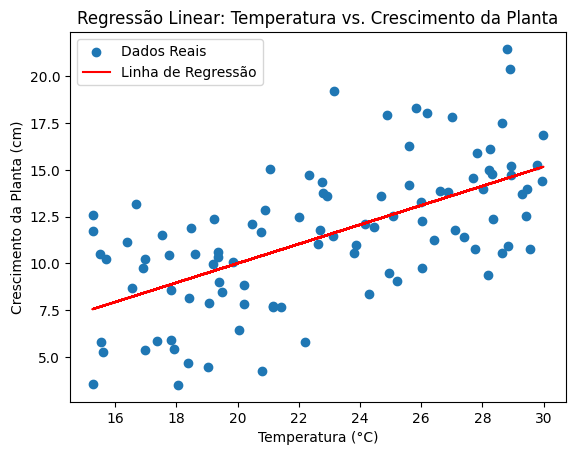

Coeficiente Angular: 0.5170
Coeficiente Linear: -0.3350


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Criando dados ambientais fictícios (exemplo: temperatura e crescimento de plantas)
np.random.seed(62)
temperatura = np.random.uniform(15, 30, 100) # Temperatura em graus Celsius
crescimento_planta = 0.5 * temperatura + np.random.normal(0, 3, 100) # Crescimento em cm

# Criando um DataFrame
df_ambiental = pd.DataFrame({"Temperatura": temperatura, "Crescimento da Planta": crescimento_planta})

# Realizando a regressão linear
X = df_ambiental[['Temperatura']]
y = df_ambiental['Crescimento da Planta']

modelo_regressao = LinearRegression()
modelo_regressao.fit(X, y)

# Previsões
previsoes = modelo_regressao.predict(X)

# Visualizando os resultados
plt.scatter(X, y, label='Dados Reais')
plt.plot(X, previsoes, color='red', label='Linha de Regressão')
plt.xlabel("Temperatura (°C)")
plt.ylabel("Crescimento da Planta (cm)")
plt.title("Regressão Linear: Temperatura vs. Crescimento da Planta")
plt.legend()
plt.show()

# Coeficientes do modelo
print(f"Coeficiente Angular: {modelo_regressao.coef_[0]:.4f}")
print(f"Coeficiente Linear: {modelo_regressao.intercept_:.4f}")